Incorporating libraries

In [23]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import os
np.random.seed(42)

In [24]:
working_directory=os.getcwd()
print(working_directory)

/Users/soumyajitmukherjee/Desktop/MachineLearning_CloudxLab/Git_Project/ml/machine_learning


In [25]:
filePath = working_directory+'/datasets/bike_sharing/hour.csv'
bikesData = pd.read_csv(filePath)
print(bikesData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [26]:
print(bikesData.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [27]:

columnsToDrop = ['instant','casual','registered','atemp','dteday']
#as these coulumns are redundant

bikesData = bikesData.drop(columnsToDrop,1)
bikesData

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.56,0.1343,61


In [28]:
np.random.seed(42) #to ensure the results of the exercise are repeatable.
from sklearn.model_selection import train_test_split

bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24
bikesData

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16,0.000000
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40,0.041667
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32,0.083333
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13,0.125000
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,119,723.916667
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,89,723.958333
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,90,724.000000
17377,1,1,12,22,0,1,1,1,0.26,0.56,0.1343,61,724.041667


In [37]:
pd.Series(range(bikesData.shape[0]))/24 #to gain linearity so ML model works well

0          0.000000
1          0.041667
2          0.083333
3          0.125000
4          0.166667
            ...    
17374    723.916667
17375    723.958333
17376    724.000000
17377    724.041667
17378    724.083333
Length: 17379, dtype: float64

In [38]:
train_set, test_set = train_test_split(bikesData, test_size=0.3, random_state=42)

print(len(train_set), "train +", len(test_set), "test")

12165 train + 5214 test


In [39]:
train_set.sort_values('dayCount', axis= 0, inplace=True)
test_set.sort_values('dayCount', axis= 0, inplace=True)

/Users/soumyajitmukherjee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/soumyajitmukherjee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
test_set

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16,0.000000
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13,0.125000
5,1,0,1,5,0,6,0,2,0.24,0.75,0.0896,1,0.208333
8,1,0,1,8,0,6,0,1,0.24,0.75,0.0000,8,0.333333
14,1,0,1,14,0,6,0,2,0.46,0.72,0.2836,106,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17354,1,1,12,23,0,0,0,1,0.20,0.51,0.2239,49,723.083333
17355,1,1,12,0,0,1,1,1,0.18,0.55,0.1940,34,723.125000
17367,1,1,12,12,0,1,1,2,0.24,0.56,0.1940,224,723.625000
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,89,723.958333


In [60]:
#will be using it later to calculate the basics stats of observed scores from cross-validation of models

def display_scores(scores):
    print("\nScores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [47]:
columnsToScale = ['temp','hum','windspeed']
#since these coulumns data are not in same range, ML algo might not work properly, 
#hence correcting it by scaling it
#generally values are kept between 0 and 1
scaler = StandardScaler()

train_set[columnsToScale] = scaler.fit_transform(train_set[columnsToScale])
train_set[columnsToScale].describe() #to check statistics

/Users/soumyajitmukherjee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/soumyajitmukherjee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,temp,hum,windspeed
count,1.216500e+04,1.216500e+04,1.216500e+04
mean,1.658955e-15,-2.594171e-17,-1.560044e-15
std,1.000041e+00,1.000041e+00,1.000041e+00
min,-2.476000e+00,-3.245965e+00,-1.552670e+00
25%,-8.186290e-01,-7.628859e-01,-6.962541e-01
50%,1.005628e-02,1.307622e-02,-2.069907e-01
75%,8.387416e-01,8.407692e-01,5.264946e-01
max,2.599698e+00,1.927116e+00,5.419128e+00


In [48]:
test_set[columnsToScale] = scaler.transform(test_set[columnsToScale])
#not using fit_transform so that model should learn the stat parameters from training set and predict on test set,
#thus we will be able to see how good our model can predict

/Users/soumyajitmukherjee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/soumyajitmukherjee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [50]:
train_set

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
1,1,0,1,1,0,6,0,1,-1.440143,0.892500,-1.552670,40,0.041667
2,1,0,1,2,0,6,0,1,-1.440143,0.892500,-1.552670,32,0.083333
4,1,0,1,4,0,6,0,1,-1.336557,0.633846,-1.552670,1,0.166667
6,1,0,1,6,0,6,0,1,-1.440143,0.892500,-1.552670,2,0.250000
7,1,0,1,7,0,6,0,1,-1.543729,1.202885,-1.552670,3,0.291667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,1,1,12,17,0,1,1,2,-1.232972,-0.762886,-0.818365,164,723.833333
17373,1,1,12,18,0,1,1,2,-1.232972,-0.762886,-0.452032,122,723.875000
17374,1,1,12,19,0,1,1,2,-1.232972,-0.142116,-0.206991,119,723.916667
17376,1,1,12,21,0,1,1,1,-1.232972,-0.142116,-0.206991,90,724.000000


In [53]:
trainingCols = train_set.drop(['cnt'], axis=1)
trainingCols #this is the input to ML algo

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,dayCount
1,1,0,1,1,0,6,0,1,-1.440143,0.892500,-1.552670,0.041667
2,1,0,1,2,0,6,0,1,-1.440143,0.892500,-1.552670,0.083333
4,1,0,1,4,0,6,0,1,-1.336557,0.633846,-1.552670,0.166667
6,1,0,1,6,0,6,0,1,-1.440143,0.892500,-1.552670,0.250000
7,1,0,1,7,0,6,0,1,-1.543729,1.202885,-1.552670,0.291667
...,...,...,...,...,...,...,...,...,...,...,...,...
17372,1,1,12,17,0,1,1,2,-1.232972,-0.762886,-0.818365,723.833333
17373,1,1,12,18,0,1,1,2,-1.232972,-0.762886,-0.452032,723.875000
17374,1,1,12,19,0,1,1,2,-1.232972,-0.142116,-0.206991,723.916667
17376,1,1,12,21,0,1,1,1,-1.232972,-0.142116,-0.206991,724.000000


In [54]:
trainingLabels = train_set['cnt']
trainingLabels #this ML algo need to predict

1         40
2         32
4          1
6          2
7          3
        ... 
17372    164
17373    122
17374    119
17376     90
17378     49
Name: cnt, Length: 12165, dtype: int64

In [63]:
#Train a Decision Tree Regressor

dec_reg = DecisionTreeRegressor(random_state = 42)

#Mean Absolute Error
dt_mae_scores = -cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")

display_scores(dt_mae_scores)

#Root Mean Squared Error
dt_mse_scores = np.sqrt(-cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))

display_scores(dt_mse_scores)


Scores: [42.94494659 50.37222679 36.95891537 44.26211997 46.99589154 71.98026316
 58.19901316 48.87417763 50.84868421 96.46217105]
Mean: 54.7898409457034
Standard deviation: 16.563759407187572

Scores: [ 65.39786583  77.67402864  60.57274567  73.73250527  75.48574011
 113.22922285  96.5884429   82.11639785  86.86752618 149.13680359]
Mean: 88.0801278896052
Standard deviation: 24.927341207369675


In [64]:
#Train a Linear Regression model

lin_reg = LinearRegression()

#Mean Absolute Error
lr_mae_scores = -cross_val_score(lin_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")

display_scores(lr_mae_scores)

#Root Mean Squared Error
lr_mse_scores = np.sqrt(-cross_val_score(lin_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))

display_scores(lr_mse_scores)


Scores: [ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717]
Mean: 110.4324125694229
Standard deviation: 31.426965705295334

Scores: [ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678]
Mean: 141.19022901181796
Standard deviation: 37.555650759195025


In [67]:
#Train a Random Forest Regressor

forest_reg = RandomForestRegressor(n_estimators=150, random_state=42)

#Mean Absolute Error
rf_mae_scores = -cross_val_score(forest_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")

display_scores(rf_mae_scores)




Scores: [33.39666393 33.54451931 28.50225692 31.78826623 36.55658724 57.81963268
 40.96405702 40.84652961 37.57766447 84.69771382]
Mean: 42.56938912059061
Standard deviation: 15.980256848600963


In [66]:
#Root Mean Squared Error
rf_mse_scores = np.sqrt(-cross_val_score(forest_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))

display_scores(rf_mse_scores)


Scores: [ 45.64176074  50.97205843  43.37588352  52.2640926   60.46557726
  94.24478873  66.26045287  65.45672124  61.69916554 131.9727285 ]
Mean: 67.23532294382946
Standard deviation: 25.544513111074128


In [68]:
#Fine-tuning the best model based RMSE metric
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try combinations of hyperparameters
    {'n_estimators': [120, 150], 'max_features': [10, 12], 'max_depth': [15, 28]},
]

In [70]:
#trying to find the best hyperparameter combination
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

In [71]:
grid_search.fit(trainingCols, trainingLabels)

print(grid_search.best_estimator_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=28, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)


In [72]:
print(grid_search.best_params_)

{'max_depth': 28, 'max_features': 10, 'n_estimators': 150}


In [73]:
feature_importances = grid_search.best_estimator_.feature_importances_

#to get the score of important features of the training dataset, trainingCols
print(feature_importances)

[0.00424888 0.00145493 0.00570279 0.58348648 0.00215107 0.01790669
 0.06993018 0.01688336 0.09373438 0.03176755 0.00907719 0.16365649]


In [75]:
final_model = grid_search.best_estimator_

In [76]:
final_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=28, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [77]:
test_set.sort_values('dayCount', axis= 0, inplace=True)

/Users/soumyajitmukherjee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
test_x_cols=(test_set.drop(['cnt'], axis=1)).columns.values
test_x_cols

array(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'dayCount'], dtype=object)

In [84]:
test_y_cols = 'cnt'
test_y_cols

'cnt'

In [86]:
X_test = test_set.loc[:,test_x_cols]
X_test

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,dayCount
0,1,0,1,0,0,6,0,1,0.24,0.81,4.672702e-18,0.000000
3,1,0,1,3,0,6,0,1,0.24,0.75,4.672702e-18,0.125000
5,1,0,1,5,0,6,0,2,0.24,0.75,8.960000e-02,0.208333
8,1,0,1,8,0,6,0,1,0.24,0.75,4.672702e-18,0.333333
14,1,0,1,14,0,6,0,2,0.46,0.72,2.836000e-01,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...
17354,1,1,12,23,0,0,0,1,0.20,0.51,2.239000e-01,723.083333
17355,1,1,12,0,0,1,1,1,0.18,0.55,1.940000e-01,723.125000
17367,1,1,12,12,0,1,1,2,0.24,0.56,1.940000e-01,723.625000
17375,1,1,12,20,0,1,1,2,0.26,0.60,1.642000e-01,723.958333


In [87]:
y_test = test_set.loc[:,test_y_cols]
y_test

0         16
3         13
5          1
8          8
14       106
        ... 
17354     49
17355     34
17367    224
17375     89
17377     61
Name: cnt, Length: 5214, dtype: int64

In [88]:
test_set.loc[:,'predictedCounts_test'] = final_model.predict(X_test)

/Users/soumyajitmukherjee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/soumyajitmukherjee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [89]:
test_set

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount,predictedCounts_test
0,1,0,1,0,0,6,0,1,0.24,0.81,4.672702e-18,16,0.000000,67.106667
3,1,0,1,3,0,6,0,1,0.24,0.75,4.672702e-18,13,0.125000,14.933333
5,1,0,1,5,0,6,0,2,0.24,0.75,8.960000e-02,1,0.208333,4.593333
8,1,0,1,8,0,6,0,1,0.24,0.75,4.672702e-18,8,0.333333,141.666667
14,1,0,1,14,0,6,0,2,0.46,0.72,2.836000e-01,106,0.583333,195.773333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17354,1,1,12,23,0,0,0,1,0.20,0.51,2.239000e-01,49,723.083333,84.660000
17355,1,1,12,0,0,1,1,1,0.18,0.55,1.940000e-01,34,723.125000,39.993333
17367,1,1,12,12,0,1,1,2,0.24,0.56,1.940000e-01,224,723.625000,202.680000
17375,1,1,12,20,0,1,1,2,0.26,0.60,1.642000e-01,89,723.958333,290.986667


In [117]:
#Prediction error
mse = mean_squared_error(y_test, test_set.loc[:,'predictedCounts_test'])
final_mse = np.sqrt(mse)
print("Final Root Mean Squared Error : ", final_mse)


from sklearn.metrics import r2_score
r2_score(y_test, test_set.loc[:,'predictedCounts_test'])

Final Root Mean Squared Error :  69.06319659523942


0.849015568806635

In [92]:
test_set

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount,predictedCounts_test
0,1,0,1,0,0,6,0,1,0.24,0.81,4.672702e-18,16,0.000000,67.106667
3,1,0,1,3,0,6,0,1,0.24,0.75,4.672702e-18,13,0.125000,14.933333
5,1,0,1,5,0,6,0,2,0.24,0.75,8.960000e-02,1,0.208333,4.593333
8,1,0,1,8,0,6,0,1,0.24,0.75,4.672702e-18,8,0.333333,141.666667
14,1,0,1,14,0,6,0,2,0.46,0.72,2.836000e-01,106,0.583333,195.773333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17354,1,1,12,23,0,0,0,1,0.20,0.51,2.239000e-01,49,723.083333,84.660000
17355,1,1,12,0,0,1,1,1,0.18,0.55,1.940000e-01,34,723.125000,39.993333
17367,1,1,12,12,0,1,1,2,0.24,0.56,1.940000e-01,224,723.625000,202.680000
17375,1,1,12,20,0,1,1,2,0.26,0.60,1.642000e-01,89,723.958333,290.986667


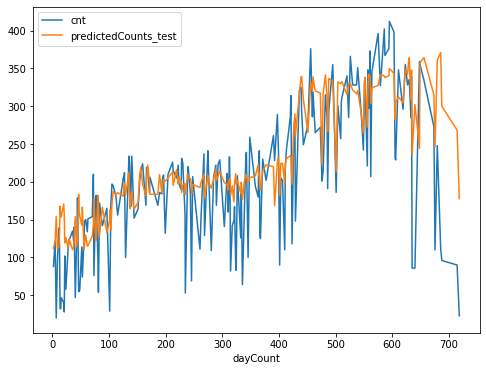

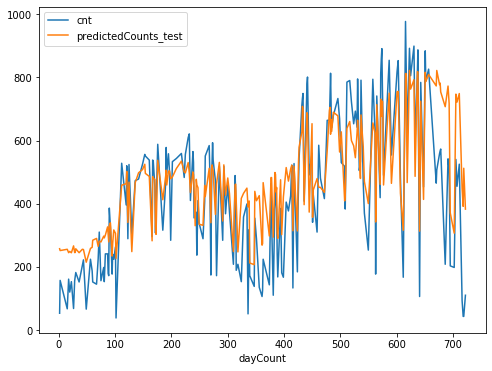

In [110]:
# goal was to predict the bike count between 9am to 6pm daily
times = [9,18]
for time in times:
    fig = plt.figure(figsize=(8, 6))#setting the height and weight
    fig.clf() #clears the current figure, if any
    ax = fig.gca() #to get the current axis
    test_set_freg_time = test_set[test_set.hr == time]# to get the entire row data of that particular hour
    #print(test_set_freg_time)
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
    plt.show()

In [111]:
print(test_set_freg_time)

       season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
41          1   0     1  18        0        0           0           2  0.36   
63          1   0     1  18        0        1           1           1  0.24   
366         1   0     1  18        0        0           0           1  0.20   
425         1   0     1  18        0        3           1           1  0.34   
473         1   0     1  18        0        5           1           1  0.12   
...       ...  ..   ...  ..      ...      ...         ...         ...   ...   
17063       4   1    12  18        0        2           1           1  0.38   
17183       1   1    12  18        0        0           0           1  0.30   
17229       1   1    12  18        1        2           0           2  0.32   
17253       1   1    12  18        0        3           1           3  0.28   
17325       1   1    12  18        0        6           0           1  0.30   

        hum  windspeed  cnt    dayCount  predictedC

In [118]:
#Export Model
from sklearn.externals import joblib
joblib.dump (final_model,'BikeCountPredictModel.ml')

/Users/soumyajitmukherjee/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['BikeCountPredictModel.ml']